In [2]:

import scipy.stats as stats

[0.45119526 0.15952161 0.08683257 0.05639941 0.04035613 0.03069995
 0.02436225 0.0199402  0.01671094 0.01426805 0.01236732 0.01085407
 0.00962608 0.00861336 0.00776654 0.00704993 0.00643711 0.00590821
 0.00544796 0.00504452 0.00468852 0.00437251 0.00409047 0.00383749
 0.00360956]


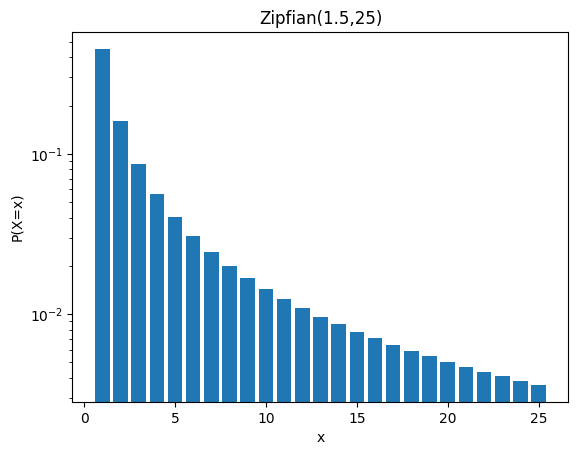

In [3]:
a = 1.5
n = 25

#plot the pmf of the zipfian(a,n) distribution
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, n+1)
pmf = stats.zipfian.pmf(x, a, n)
print(pmf)
plt.bar(x, pmf)
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.yscale('log')
plt.title('Zipfian({},{})'.format(a,n))
plt.show()

[0.45119525634327323, 0.15952161269976556, 0.086832567568957, 0.056399407042909154, 0.04035613057236009, 0.030699948677924294, 0.024362253898292635, 0.019940201587470695, 0.016710935420121233, 0.014268046795082784, 0.012367317127924458, 0.010854070946119626, 0.009626080662673316, 0.008613357468235563, 0.007766540949801262, 0.007049925880363644, 0.006437113147684957, 0.005908207877769095, 0.005447962676468856, 0.005044516321545011, 0.0046885179487484215, 0.004372506903119961, 0.004090465847902142, 0.003837493584740537, 0.003609562050746186]


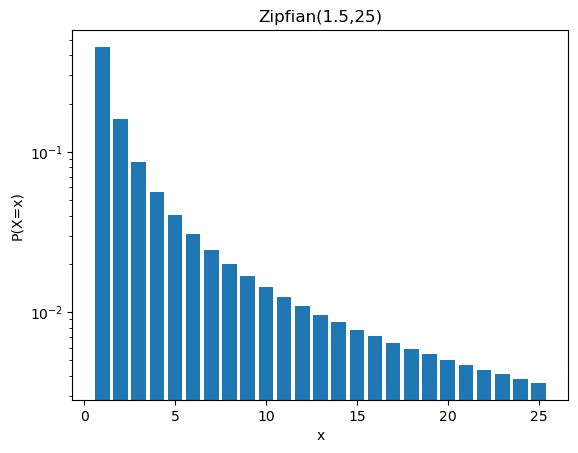

exp(-2) =  0.1353352832366127
Probaility of zero cut trace = z(1)exp(-2)=0.061062637812232985, where z(x) is the pmf of Zipfian(1.5,25)


In [12]:
harm = 0

for k in range(1, n+1):
    harm += 1/k**a

zipf_self = []
for k in range(1, n+1):
    zipf_self.append(1/((k**a)*harm))


print(zipf_self)

plt.bar(x, zipf_self)
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.yscale('log')
plt.title('Zipfian({},{})'.format(a,n))
plt.show()

print("exp(-2) = ", np.exp(-2))
# probability of zero cut trace
print(f"Probaility of zero cut trace = z(1)exp(-2)={pmf[0]*np.exp(-2)}, where z(x) is the pmf of Zipfian({a},{n})")

In [5]:
#let M be the average of a zipfian(1.5,25) distribution
m = stats.zipfian.mean(a, n)
print("Mean of Zipfian(1.5,25) = ", m)

avg_c = 2*m

#~expected # of empty bins

print("Approx. Expected # of empty bins = ", m*(1 - 1/m)**(avg_c+1))

Mean of Zipfian(1.5,25) =  3.8980166787247157
Approx. Expected # of empty bins =  0.28735424708139945


In [ ]:
def approx_prob_of_leak(alpha, zipf_pmf, backstory_len=7):
    sum = 0
    for m in range(alpha + 1, len(zipf_pmf) + 1):
        # print("m = ", m)
        lb = 1 - m*np.log((m - alpha)/m)
        # print("lb = ", lb)
        pois_ccdf = 1 - stats.poisson.cdf(lb, m)
        val = pois_ccdf * zipf_pmf[m-1]
        # print("val = ", val)
        sum += val

    print(f"Approx. prob. of leak for alpha = {alpha} is {sum}\n {250 - backstory_len*alpha} indices in the context left for data\n")
    return sum

In [17]:
zipf_pmf = stats.zipfian.pmf(x, a, n)

for alpha in range(1, 21):
    approx_prob_of_leak(alpha, zipf_pmf)

Approx. prob. of leak for alpha = 1 is 0.382587745207595
 243 indices in the context left for data

Approx. prob. of leak for alpha = 2 is 0.2752650554478192
 236 indices in the context left for data

Approx. prob. of leak for alpha = 3 is 0.2058835795632753
 229 indices in the context left for data

Approx. prob. of leak for alpha = 4 is 0.16074731188040745
 222 indices in the context left for data

Approx. prob. of leak for alpha = 5 is 0.12907967656656683
 215 indices in the context left for data

Approx. prob. of leak for alpha = 6 is 0.10240609669137116
 208 indices in the context left for data

Approx. prob. of leak for alpha = 7 is 0.08196035091090936
 201 indices in the context left for data

Approx. prob. of leak for alpha = 8 is 0.06702294743953116
 194 indices in the context left for data

Approx. prob. of leak for alpha = 9 is 0.05415673012611292
 187 indices in the context left for data

Approx. prob. of leak for alpha = 10 is 0.042592258161117
 180 indices in the context 